---
# World Cup-Project
---

In [132]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sas
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode ,plot ,iplot 
init_notebook_mode(connected=True)
sas.set()

In [133]:
groups = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/2022_world_cup_groups.csv')
world_cup_22 = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/2022_world_cup_matches.csv' , parse_dates=['Date'])
data_dictionary = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/data_dictionary.csv')
international_matches = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/international_matches.csv', parse_dates=['Date'])
world_cup_matches = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/world_cup_matches.csv')
world_cups = pd.read_csv('H:/PYTHON/python for data science/s11-project/world cup/world_cups.csv')


---
# Understand 
---

In [134]:
data_dictionary

,Table,Field,Description
0,world_cups,Year,Year in which the World Cup took place
1,world_cups,Host Country,Country that hosted the tournament
2,world_cups,Winner,Country that won the tournament
3,world_cups,Runners-Up,Country that received second place
4,world_cups,Third,Country that received third place
5,world_cups,Fourth,Country that received fourth place
6,world_cups,Goals Scored,Total number of goals scored in the tournament
7,world_cups,Qualified Teams,Total number of teams that participated in the...
8,world_cups,Matches Played,Total number of matches played in the tournament
9,2022_world_cup_groups,Group,Group for the first stage of the tournament (c...


---
# ASK
---

__1-How many team participate in world cup 22 ?__

__2-How many match we will see in world cup 22 ?__

__3-How many match for each stage ?__

__4-How long period the world cup playing ?__

__5-who team is the host ?__

__6-What are the top 10 teams that have the highest FIFA ranking that participates in world cup 22 ?__

__7-What are the top 10 teams that have the lowest FIFA ranking that participates in world cup 22 ?__

__8-What is the most group that has teams that have the highest FIFA ranking that participates in the world cup 22 ?__ 

__9-What is the most group that has teams that have the lowest FIFA ranking that participates in the world cup 22 ?__ 

__10-Who is the team recommended for the tournament ?__

---

__11-How many team we have ?__

__12-How many Tournaments are friendly?__

__13-How many official tournaments?__

__14-How many official tournaments for each year?__

__15-How many official tournaments for each quarter?__

__16-How many official tournaments for each month?__

__17-What are the most teams that hosted tournaments?__

__18-What are the most teams that hosted friendly tournaments?__

__19-What are the most teams that hosted official tournaments?__

__20-Is the home teams score goals greater than away teams or the opposite?__

__21-Does the host team most times is winning?__

__22-What are the most teams that winning ?__

__23-How many draw result that has repetition ?__

__24-How many team win by penalties ?__

__25-Does the home stadium affect on game's result ?__

---

__26-How many world cups have played ?__

__27-What is the most country has hosted world cup?__

__28-What are the most countries that have won by world cup?__

__29-What are the most countries that have won by a silver medal?__

__30-What are the most countries that have won by a bronze medal?__

__31-What are the most countries that have goals in world cup ?__

__32-What are the most countries that have participated in final ?__

__33-What are the most countries that have won by the fourth position?__

__34-How many matches are played in the world cups overall?__

__35-How many goals are scored in the world cups overall?__

__36-What is the average of goals for each Matches Played?__

---
## Preprocessing and Cleaning
---

In [135]:
world_cup_22.columns = world_cup_22.columns.str.replace(" ","_")
groups.columns = groups.columns.str.replace(" ","_")

In [136]:
world_cup_22 = world_cup_22.join(groups)

In [137]:
world_cup_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            64 non-null     int64         
 1   Year          64 non-null     int64         
 2   Date          64 non-null     datetime64[ns]
 3   Stage         64 non-null     object        
 4   Home_Team     64 non-null     object        
 5   Away_Team     64 non-null     object        
 6   Host_Team     48 non-null     object        
 7   Group         32 non-null     object        
 8   Team          32 non-null     object        
 9   FIFA_Ranking  32 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 5.1+ KB


In [138]:
world_cup_22.fillna({'Host_Team':'Unkown','Group':'Unkown','Team':'Unkown','FIFA_Ranking': 0} , inplace=True)

In [139]:
world_cup_22 = world_cup_22.convert_dtypes()

In [140]:
world_cup_22

,ID,Year,Date,Stage,Home_Team,Away_Team,Host_Team,Group,Team,FIFA_Ranking
0,1,2022,2022-11-20,Group stage,Qatar,Ecuador,True,A,Qatar,50
1,2,2022,2022-11-21,Group stage,Senegal,Netherlands,False,A,Ecuador,44
2,3,2022,2022-11-21,Group stage,England,Iran,False,A,Senegal,18
3,4,2022,2022-11-21,Group stage,United States,Wales,False,A,Netherlands,8
4,5,2022,2022-11-22,Group stage,France,Australia,False,B,England,5
...,...,...,...,...,...,...,...,...,...,...
59,60,2022,2022-12-10,Quarter-finals,W55,W56,Unkown,Unkown,Unkown,0
60,61,2022,2022-12-13,Semi-finals,W57,W58,Unkown,Unkown,Unkown,0
61,62,2022,2022-12-14,Semi-finals,W59,W60,Unkown,Unkown,Unkown,0
62,63,2022,2022-12-17,Third place,L61,L62,Unkown,Unkown,Unkown,0


In [141]:
Group_stage = world_cup_22[world_cup_22.Team != 'Unkown']
Group_stage

,ID,Year,Date,Stage,Home_Team,Away_Team,Host_Team,Group,Team,FIFA_Ranking
0,1,2022,2022-11-20,Group stage,Qatar,Ecuador,True,A,Qatar,50
1,2,2022,2022-11-21,Group stage,Senegal,Netherlands,False,A,Ecuador,44
2,3,2022,2022-11-21,Group stage,England,Iran,False,A,Senegal,18
3,4,2022,2022-11-21,Group stage,United States,Wales,False,A,Netherlands,8
4,5,2022,2022-11-22,Group stage,France,Australia,False,B,England,5
5,6,2022,2022-11-22,Group stage,Denmark,Tunisia,False,B,Iran,20
6,7,2022,2022-11-22,Group stage,Mexico,Poland,False,B,United States,16
7,8,2022,2022-11-22,Group stage,Argentina,Saudi Arabia,False,B,Wales,19
8,9,2022,2022-11-23,Group stage,Belgium,Canada,False,C,Argentina,3
9,10,2022,2022-11-23,Group stage,Spain,Costa Rica,False,C,Saudi Arabia,51


----

In [142]:
international_matches.columns = international_matches.columns.str.replace(' ','_')

In [143]:
international_matches.isna().sum()

ID                    0
Tournament            0
Date                  0
Home_Team             0
Home_Goals            0
Away_Goals            0
Away_Team             0
Winning_Team       4170
Losing_Team        4170
Win_Conditions    17568
Home_Stadium          0
dtype: int64

In [144]:
international_matches[international_matches.Win_Conditions.notna()]

,ID,Tournament,Date,Home_Team,Home_Goals,Away_Goals,Away_Team,Winning_Team,Losing_Team,Win_Conditions,Home_Stadium
4148,4149,King's Cup,1971-11-14,South Korea,1,1,Vietnam Republic,NaN,NaN,South Korea win on penalties,False
4221,4222,AFC Asian Cup,1972-05-17,Thailand,1,1,South Korea,NaN,NaN,South Korea win on penalties,True
4383,4384,African Cup of Nations qualification,1973-04-21,Senegal,1,0,Ghana,Senegal,Ghana,Ghana win on penalties,True
4456,4457,Merdeka Tournament,1973-07-28,Myanmar,0,0,South Korea,NaN,NaN,Myanmar win on penalties,False
4580,4581,Gulf Cup,1974-03-28,Qatar,1,1,United Arab Emirates,NaN,NaN,Qatar win on penalties,False
...,...,...,...,...,...,...,...,...,...,...,...
17586,17587,African Cup of Nations,2022-02-05,Cameroon,3,3,Burkina Faso,NaN,NaN,Cameroon win on penalties,True
17587,17588,African Cup of Nations,2022-02-06,Senegal,0,0,Egypt,NaN,NaN,Senegal win on penalties,False
17621,17622,FIFA World Cup qualification,2022-03-29,Senegal,1,0,Egypt,Senegal,Egypt,Senegal win on penalties,True
17710,17711,FIFA World Cup qualification,2022-06-13,Australia,0,0,Peru,NaN,NaN,Australia win on penalties,False


In [145]:
international_matches.fillna({'Winning_Team':'Draw' , 'Losing_Team':'Draw','Win_Conditions':'No Win Conditions'}, inplace=True)

In [146]:
international_matches = international_matches.convert_dtypes()

In [147]:
international_matches['years'] = international_matches.Date.dt.year
international_matches['Quarter'] = international_matches.Date.dt.quarter
international_matches['months'] = international_matches.Date.dt.month_name()
international_matches['day_name'] = international_matches.Date.dt.day_name()
international_matches['days'] = international_matches.Date.dt.day

In [148]:
international_matches

,ID,Tournament,Date,Home_Team,Home_Goals,Away_Goals,Away_Team,Winning_Team,Losing_Team,Win_Conditions,Home_Stadium,years,Quarter,months,day_name,days
0,1,Friendly,1872-11-30,Scotland,0,0,England,Draw,Draw,No Win Conditions,True,1872,4,November,Saturday,30
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,No Win Conditions,True,1873,1,March,Saturday,8
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,No Win Conditions,True,1874,1,March,Saturday,7
3,4,Friendly,1875-03-06,England,2,2,Scotland,Draw,Draw,No Win Conditions,True,1875,1,March,Saturday,6
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,No Win Conditions,True,1876,1,March,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17764,17765,Friendly,2022-09-27,Qatar,2,2,Chile,Draw,Draw,No Win Conditions,False,2022,3,September,Tuesday,27
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,Draw,Draw,No Win Conditions,False,2022,3,September,Tuesday,27
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,No Win Conditions,True,2022,3,September,Tuesday,27
17767,17768,UEFA Nations League,2022-09-27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,No Win Conditions,True,2022,3,September,Tuesday,27


---

In [149]:
world_cups.Year = world_cups.Year.astype('category')
world_cups = world_cups.convert_dtypes()

In [150]:
world_cups.dtypes

Year               category
Host Country         string
Winner               string
Runners-Up           string
Third                string
Fourth               string
Goals Scored          Int64
Qualified Teams       Int64
Matches Played        Int64
dtype: object

In [151]:
world_cups.columns = world_cups.columns.str.replace(r'-|\s' , '_')

C:\Users\bhr\AppData\Local\Temp\ipykernel_128\3479367834.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [152]:
world_cups.columns

Index(['Year', 'Host_Country', 'Winner', 'Runners_Up', 'Third', 'Fourth',
       'Goals_Scored', 'Qualified_Teams', 'Matches_Played'],
      dtype='object')

In [153]:
world_cups.fillna({'Winner'	:'Unkown','Runners_Up':'Unkown','Third':'Unkown','Fourth':'Unkown',	'Goals_Scored':0} , inplace=True)

In [154]:
world_cups

,Year,Host_Country,Winner,Runners_Up,Third,Fourth,Goals_Scored,Qualified_Teams,Matches_Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38


---
## Analysis and Visualization

---

__1-How many team participate in world cup 22 ?__

In [155]:
q_1 = world_cup_22[world_cup_22.Team != 'Unkown']['Team'].count()
q_1

32

__2-How many match we will see in world cup 22 ?__

In [156]:
q_2 = world_cup_22.ID.count()
q_2

64

__3-How many match for each stage ?__

In [157]:
q_3 = world_cup_22.groupby('Stage').agg(number_of_matchs = ('ID','count')).reset_index()
q_3

,Stage,number_of_matchs
0,Final,1
1,Group stage,48
2,Quarter-finals,4
3,Round of 16,8
4,Semi-finals,2
5,Third place,1


In [158]:
px.pie(q_3 , values='number_of_matchs', names='Stage', color_discrete_sequence=px.colors.qualitative.Pastel1,template='plotly_dark' , title='Number of matchs for each stage.')


__4-How long period the world cup playing ?__

In [159]:
q_4 = (world_cup_22.iloc[-1,2] - world_cup_22.iloc[0,2]).days
q_4

28

__5-who team is the host ?__

In [160]:
world_cup_22.Host_Team = world_cup_22.Host_Team.astype('bool')

In [161]:
q_5 = world_cup_22[(world_cup_22.Host_Team == True) & (world_cup_22.Team != 'Unkown')]['Home_Team'][0]
q_5

'Qatar'

__6-What are the top 10 teams that have the highest FIFA ranking that participates in world cup 22 ?__

In [162]:
q_6 = Group_stage[['Team','FIFA_Ranking']].nsmallest(10 , columns=['FIFA_Ranking']).reset_index(drop=True)
q_6

,Team,FIFA_Ranking
0,Brazil,1
1,Belgium,2
2,Argentina,3
3,France,4
4,England,5
5,Spain,7
6,Netherlands,8
7,Portugal,9
8,Denmark,10
9,Germany,11


In [163]:
px.bar(q_6 , x = 'Team' , y ='FIFA_Ranking' , color='FIFA_Ranking' , color_continuous_scale='twilight' , text='FIFA_Ranking' , template='none' , labels={'FIFA_Ranking':' '}, title='Top 10 team FIFA Ranking.')

__7-What are the top 10 teams that have the lowest FIFA ranking that participates in world cup 22 ?__

In [164]:
q_7 = Group_stage[['Team','FIFA_Ranking']].nlargest(10 , columns=['FIFA_Ranking']).reset_index(drop=True).sort_values(by='FIFA_Ranking', ascending=True)
q_7

,Team,FIFA_Ranking
9,South Korea,28
8,Tunisia,30
7,Costa Rica,31
6,Australia,38
5,Canada,41
4,Cameroon,43
3,Ecuador,44
2,Qatar,50
1,Saudi Arabia,51
0,Ghana,61


In [165]:
px.bar(q_6 , y = 'Team' , x ='FIFA_Ranking' , color='FIFA_Ranking' , text='FIFA_Ranking' , template='none' , labels={'FIFA_Ranking':' '}, title='lowest 10 team FIFA Ranking.')

__8-What is the most group that has teams that have the highest FIFA ranking that participates in the world cup 22 ?__ 

In [166]:
Group_stage.groupby('Group').agg(number_of_ranking = ('FIFA_Ranking','sum')).sort_values(by='number_of_ranking' , ascending=True)

,number_of_ranking
Group,
B,60
E,73
F,77
G,80
D,82
C,93
H,112
A,120


In [167]:
Group_stage['number_of_ranking'] = Group_stage.groupby('Group')['FIFA_Ranking'].transform('sum')
Group_stage = Group_stage.astype({'Team':'string' , 'FIFA_Ranking':'string'})

C:\Users\bhr\AppData\Local\Temp\ipykernel_128\4083847661.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
q_8 = Group_stage[['Group','Team','FIFA_Ranking','number_of_ranking']].sort_values(by='number_of_ranking' , ascending=True)

In [169]:
px.sunburst(q_8 , path=['Group','Team','FIFA_Ranking'] ,
 width=800 , 
 height=800 , 
 color='number_of_ranking' ,
  branchvalues='remainder' , 
  color_continuous_scale='ylorrd',
   template='plotly_dark' , 
   title='the highest FIFA ranking that participates in the world cup 22')


__9-What is the most group that has teams that have the lowest FIFA ranking that participates in the world cup 22 ?__ 

In [170]:
q_8 = Group_stage[['Group','Team','FIFA_Ranking','number_of_ranking']].sort_values(by='number_of_ranking' , ascending=False)
q_8

,Group,Team,FIFA_Ranking,number_of_ranking
0,A,Qatar,50,120
1,A,Ecuador,44,120
2,A,Senegal,18,120
3,A,Netherlands,8,120
30,H,Uruguay,14,112
29,H,Ghana,61,112
28,H,Portugal,9,112
31,H,South Korea,28,112
8,C,Argentina,3,93
10,C,Mexico,13,93


In [171]:
px.sunburst(q_8 , path=['Group','Team','FIFA_Ranking'] ,
 width=800 , 
 height=800 , 
 color='number_of_ranking' ,
  branchvalues='remainder' , 
  color_continuous_scale='ylorrd',
   template='plotly_dark' , 
   title='the highest FIFA ranking that participates in the world cup 22')


__10-Who is the team recommended for the tournament ?__

In [172]:
Group_stage = Group_stage.astype({'FIFA_Ranking':'i'})
q_6 = Group_stage[['Team','FIFA_Ranking']].nsmallest(1, columns=['FIFA_Ranking'])['Team']

In [173]:
q_6

24    Brazil
Name: Team, dtype: string

---

__11-How many team we have ?__

In [174]:
a = international_matches.Home_Team.nunique()
q = international_matches.Away_Team.nunique()
q_11 = a + q 
q_11


432

__12-How many Tournaments are friendly?__

In [175]:
q_12 = international_matches[international_matches.Tournament == 'Friendly'].count()['Tournament']
q_12

7871

__13-How many official tournaments?__

In [176]:
q_13 = international_matches[international_matches.Tournament != 'Friendly']
q_13.count()['Tournament']

9898

__14-How many official tournaments for each year?__

In [177]:
q_14 = q_13.groupby('years').agg(number_of_tournaments = ('years','count')).reset_index()
q_14

,years,number_of_tournaments
0,1884,5
1,1885,5
2,1886,5
3,1887,5
4,1888,5
...,...,...
133,2018,61
134,2019,280
135,2020,74
136,2021,375


In [178]:
px.line(q_14 ,
x = 'years' ,
y = 'number_of_tournaments' ,
line_shape= 'spline',
color_discrete_sequence=['snow'],
labels={'number_of_tournaments':' '} ,
template='plotly_dark' ,
title='Number of tournaments for each year.',
hover_name='number_of_tournaments',
)


__15-How many official tournaments for each quarter?__

In [179]:
q_15 = q_13.groupby('Quarter').agg(number_of_tournaments = ('years','count')).reset_index()
q_15.Quarter = q_15.Quarter.astype('category')
q_15

,Quarter,number_of_tournaments
0,1,2141
1,2,2518
2,3,2354
3,4,2885


In [180]:
px.bar(q_15 , y = 'Quarter' , 
 x = 'number_of_tournaments' ,
 base='number_of_tournaments' , 
 text='number_of_tournaments' , 
 color_discrete_sequence=px.colors.qualitative.Safe , 
 color='Quarter',
 labels={'number_of_tournaments':' '} ,
 pattern_shape='Quarter',
 template='none',
 title='Number of tournament for each quarter.')

__16-How many official tournaments for each month?__

In [181]:
q_16 = q_13.groupby('months').agg(number_of_tournaments = ('years','count')).reset_index()
q_16

,months,number_of_tournaments
0,April,571
1,August,433
2,December,413
3,February,541
4,January,583
5,July,720
6,June,1509
7,March,1017
8,May,438
9,November,989


In [182]:
px.area(q_16 , x = 'months' , 
y = 'number_of_tournaments' ,
markers='markers' ,
labels={'number_of_tournaments':' '} ,
title='Number of tournaments for each month.' ,
color_discrete_sequence=['black'],
template='plotly_white',
hover_name='number_of_tournaments')

__17-What are the most teams that hosted tournaments?__

In [183]:
q_17 = international_matches[international_matches.Home_Stadium == True]
q_17.Home_Team.value_counts()

England          463
France           438
Germany          419
United States    413
Switzerland      397
                ... 
Bhutan             1
Taiwan             1
Djibouti           1
Timor-Leste        1
Palestine          1
Name: Home_Team, Length: 206, dtype: Int64

__18-What are the most teams that hosted friendly tournaments?__

In [184]:
q_18 = international_matches[international_matches.Tournament != 'Friendly']['Home_Team'].value_counts()
q_18

Argentina                           345
South Korea                         313
England                             284
Brazil                              279
Wales                               264
                                   ... 
Bhutan                                1
United States Virgin Islands          1
Timor-Leste                           1
Saint Vincent and the Grenadines      1
Aruba                                 1
Name: Home_Team, Length: 203, dtype: Int64

__19-What are the most teams that hosted official tournaments?__

In [185]:
q_19 = q_13.groupby(['Tournament','Home_Team','years']).agg(number_of_tournaments =('Tournament','count')).reset_index()
q_19

,Tournament,Home_Team,years,number_of_tournaments
0,AFC Asian Cup,Australia,2007,1
1,AFC Asian Cup,Australia,2011,4
2,AFC Asian Cup,Australia,2015,6
3,AFC Asian Cup,Australia,2019,3
4,AFC Asian Cup,Bahrain,2004,2
...,...,...,...,...
5767,West African Cup,Ghana,1986,6
5768,West African Cup,Ivory Coast,1983,1
5769,West African Cup,Ivory Coast,1987,1
5770,West African Cup,Liberia,1987,1


In [188]:
fig = px.bar(q_19 ,
x = 'Home_Team' , 
y='number_of_tournaments' , 
color='Tournament',
title='number of tournament for each team by tournament.',
labels={'number_of_tournaments':' ','Home_Team':' '},
hover_name='years')
fig.update_layout(xaxis_tickangle = -45)


__20-Is the home teams score goals greater than away teams or the opposite?__

In [205]:
q_20 = international_matches.Home_Goals.sum() > international_matches.Away_Goals.sum()
q_20


True

__21-Does the host team most times is winning?__

In [ ]:
wining_home = q_17[(q_17['Home_Team'] ) == (q_17['Winning_Team'])]['Winning_Team'].count()

wining_home / q_17.Winning_Team.count()

0.49972035794183445

In [ ]:
losing_home = q_17[(q_17['Home_Team'] ) == (q_17['Losing_Team'])]['Losing_Team'].count()
losing_home / q_17.Losing_Team.count()

0.26810682326621926

In [ ]:
draw_home = q_17[(q_17['Winning_Team'] ) == 'Draw']['Winning_Team'].count()
draw_home / q_17.Winning_Team.count()

0.23217281879194632

In [242]:
wining_Away = q_17[(q_17['Away_Team'] ) == (q_17['Winning_Team'])]['Winning_Team'].count()

wining_Away / q_17.Winning_Team.count()

0.26810682326621926

In [243]:
losing_Away = q_17[(q_17['Away_Team'] ) == (q_17['Losing_Team'])]['Losing_Team'].count()
losing_Away / q_17.Losing_Team.count()

0.49972035794183445

In [ ]:
draw_home = q_17[(q_17['Winning_Team'] ) == 'Draw']['Winning_Team'].count()
draw_home / q_17.Winning_Team.count()

0.23217281879194632

__22-What are the most teams that winning ?__

In [238]:
q_22 = international_matches[international_matches.Winning_Team != 'Draw']
q_22.Winning_Team.value_counts().head(10)

Brazil         578
England        565
Germany        505
Argentina      503
South Korea    470
Mexico         450
France         402
Spain          394
Netherlands    392
Uruguay        375
Name: Winning_Team, dtype: Int64

__23-How many draw result that has repetition ?__

In [241]:
q_23 = q_22['Winning_Team'].count()
q_23

13599

__24-How many team win by penalties ?__

In [252]:
q_24 = international_matches[international_matches.Win_Conditions != 'No Win Conditions'][['Tournament','Home_Team','Away_Team','Win_Conditions']]
q_24

,Tournament,Home_Team,Away_Team,Win_Conditions
4148,King's Cup,South Korea,Vietnam Republic,South Korea win on penalties
4221,AFC Asian Cup,Thailand,South Korea,South Korea win on penalties
4383,African Cup of Nations qualification,Senegal,Ghana,Ghana win on penalties
4456,Merdeka Tournament,Myanmar,South Korea,Myanmar win on penalties
4580,Gulf Cup,Qatar,United Arab Emirates,Qatar win on penalties
...,...,...,...,...
17586,African Cup of Nations,Cameroon,Burkina Faso,Cameroon win on penalties
17587,African Cup of Nations,Senegal,Egypt,Senegal win on penalties
17621,FIFA World Cup qualification,Senegal,Egypt,Senegal win on penalties
17710,FIFA World Cup qualification,Australia,Peru,Australia win on penalties


In [249]:
q_24.Win_Conditions.count()

201

__25-Does the home stadium affect on game's result ?__

<AxesSubplot:>

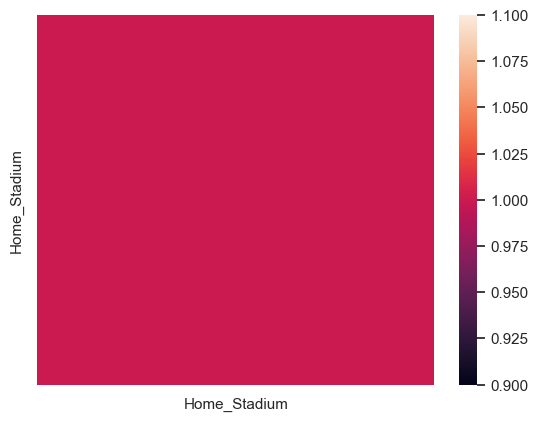

In [254]:
sas.heatmap(international_matches[['Winning_Team','Losing_Team','Home_Stadium']].corr())

__26-How many world cups have played ?__

In [257]:
q_26 = world_cups.Year.count()
q_26

22

__27-What is the most country has hosted world cup?__

In [259]:
q_27 = world_cups.Host_Country.value_counts()
q_27

Mexico          2
Brazil          2
Italy           2
Germany         2
France          2
Argentina       1
Switzerland     1
Sweden          1
Chile           1
England         1
Korea/Japan     1
Uruguay         1
USA             1
South Africa    1
Russia          1
Spain           1
Qatar           1
Name: Host_Country, dtype: Int64

__28-What are the most countries that have won by world cup?__

In [260]:
q_28 = world_cups.Winner.value_counts()
q_28

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
France        2
England       1
Spain         1
Germany       1
Unkown        1
Name: Winner, dtype: Int64

__29-What are the most countries that have won by a silver medal?__

In [261]:
q_29 = world_cups.Runners_Up.value_counts()
q_29

Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Croatia           1
Unkown            1
Name: Runners_Up, dtype: Int64

__30-What are the most countries that have won by a bronze medal?__

In [262]:
q_30 = world_cups.Third.value_counts()
q_30

Germany        3
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Germany FR     1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Belgium        1
Unkown         1
Name: Third, dtype: Int64

__31-What are the most year that have goals in world cup ?__

In [267]:
q_30 = world_cups[['Year','Goals_Scored']].sort_values(by='Goals_Scored' , ascending=False)
q_30

,Year,Goals_Scored
19,2014,171
15,1998,171
20,2018,169
16,2002,161
17,2006,147
11,1982,146
18,2010,145
14,1994,141
4,1954,140
12,1986,132


__32-What are the most countries that have participated in final ?__

In [295]:
q_32 = pd.concat([world_cups.Runners_Up ,world_cups.Winner], keys=['Runners_Up','Winner'],names=['final']).reset_index().drop('level_1' , axis=1).rename(columns={0:'teams'})
q_32.teams.value_counts()

Brazil            7
Germany FR        6
Italy             6
Argentina         5
Netherlands       3
France            3
Czechoslovakia    2
Hungary           2
Germany           2
Unkown            2
Uruguay           2
Sweden            1
Croatia           1
England           1
Spain             1
Name: teams, dtype: Int64

__33-What are the most countries that have won by the fourth position?__

In [296]:
q_33 = world_cups.Fourth.value_counts()
q_33

Uruguay           3
Brazil            2
England           2
Yugoslavia        2
France            1
Sweden            1
Spain             1
Germany FR        1
Soviet Union      1
Austria           1
Bulgaria          1
Italy             1
Netherlands       1
Korea Republic    1
Portugal          1
Belgium           1
Unkown            1
Name: Fourth, dtype: Int64

__34-How many matches are played in the world cups overall?__

In [298]:
q_34 = world_cups.Matches_Played.sum()
q_34

964

__35-How many goals are scored in the world cups overall?__

In [300]:
q_35 = world_cups.Goals_Scored.sum()
q_35

2548

__36-What is the average of goals for each Matches Played?__

In [308]:
world_cups['Average_team_goal'] = round(world_cups['Goals_Scored'] / world_cups['Matches_Played'],1)

In [311]:
q_36 = world_cups[['Year','Average_team_goal']].sort_values(by='Average_team_goal' , ascending=False)
q_36

,Year,Average_team_goal
4,1954,5.4
2,1938,4.7
1,1934,4.1
3,1950,4.0
0,1930,3.9
5,1958,3.6
8,1970,3.0
11,1982,2.8
7,1966,2.8
6,1962,2.8
